# Problem Set 1 Data Analysis

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl

import matplotlib.pyplot as plt
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', 250)
sns.set()

pd.set_option('display.notebook_repr_html', True)

def _repr_latex_(self):
    return "\centering{%s}" % self.to_latex()

pd.DataFrame._repr_latex_ = _repr_latex_  # monkey patch pandas DataFrame


## Introductory Information about the dataset

In [3]:
## Check data

dsdata = pd.read_csv("Telco-Customer-Churn.csv")
dsdata = dsdata.drop(dsdata.columns[0], axis=1) #dont need ID
ds = dsdata.copy()
ds['SeniorCitizen'] = ds['SeniorCitizen'].astype(str) #objects are implicitly 'str'
ds['TotalCharges']  = pd.to_numeric(ds.TotalCharges, errors='coerce')
#idx = ds.select_dtypes(include='object').columns.values
#ds[idx] = ds[idx].astype('str')


## No lack of data , however Senior citizen is 'int' and 'TotalCharges' is object (string!)

In [4]:
display(ds.head(n=5))

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(1), object(17)
memory usage: 1.1+ MB


### Functions for computation of relevant statistics of categorical variables

In [6]:
# counts 
def count_categorical(df):
    dsfeature = df.columns
    dfprint = pd.DataFrame(columns=['Variable Name','Category/Count'])
    for i in dsfeature:
        #if (i != 'customerID') and (i !='tenure') and (i !='MonthlyCharges') and (i !='TotalCharges') :
        if type(df[i].values[0]) == str:
            dfprint = dfprint.append({'Variable Name':i,'Category/Count':list(zip(list(df[i].value_counts().index),df[i].value_counts().values))}, ignore_index=True)

    return dfprint
    
def get_num_cols(df):
    idx = df.select_dtypes(exclude='object').columns.values
    dF = df[idx].dropna() #remove NaNs or else it cant plot
    return dF.columns

def plot_hist2(df,df2,df_col):
    df = df.dropna()  
    df2 = df2.dropna() 
    for d in df_col:
        print("Empirical Distribution of Variable "+d)
        fig, axes = plt.subplots(1,2,figsize=(15,9))
        sns.distplot(df[d],ax=axes[0])
        sns.distplot(df2[d],ax=axes[1])
        axes[0].set_ylabel("Probability")
        axes[1].set_ylabel("Probability")
        plt.suptitle("Empirical Probability Distribution of Numerical Variable "+d)
        plt.show()
        
def plot_hist(df,df_col):
    df = df.dropna()  
    for d in df_col:
        #print("Empirical Distribution of Variable "+d)
        plt.figure(figsize=(15,9))
        sns.distplot(df[d])
        plt.ylabel("Probability")
        plt.title("Empirical Probability Distribution of Numerical Variable "+d)
        plt.show()

In [7]:
print("For categorical variables:")
dfprint = count_categorical(ds)
dfprint



For categorical variables:


,Variable Name,Category/Count
0,gender,"[(Male, 3555), (Female, 3488)]"
1,SeniorCitizen,"[(0, 5901), (1, 1142)]"
2,Partner,"[(No, 3641), (Yes, 3402)]"
3,Dependents,"[(No, 4933), (Yes, 2110)]"
4,PhoneService,"[(Yes, 6361), (No, 682)]"
5,MultipleLines,"[(No, 3390), (Yes, 2971), (No phone service, 682)]"
6,InternetService,"[(Fiber optic, 3096), (DSL, 2421), (No, 1526)]"
7,OnlineSecurity,"[(No, 3498), (Yes, 2019), (No internet service, 1526)]"
8,OnlineBackup,"[(No, 3088), (Yes, 2429), (No internet service, 1526)]"
9,DeviceProtection,"[(No, 3095), (Yes, 2422), (No internet service, 1526)]"


In [8]:
print("For numerical variables:")
ds.describe().round(4).T

For numerical variables:


,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.3711,24.5595,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.7617,30.0900,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.3004,2266.7714,18.80,401.45,1397.475,3794.7375,8684.80


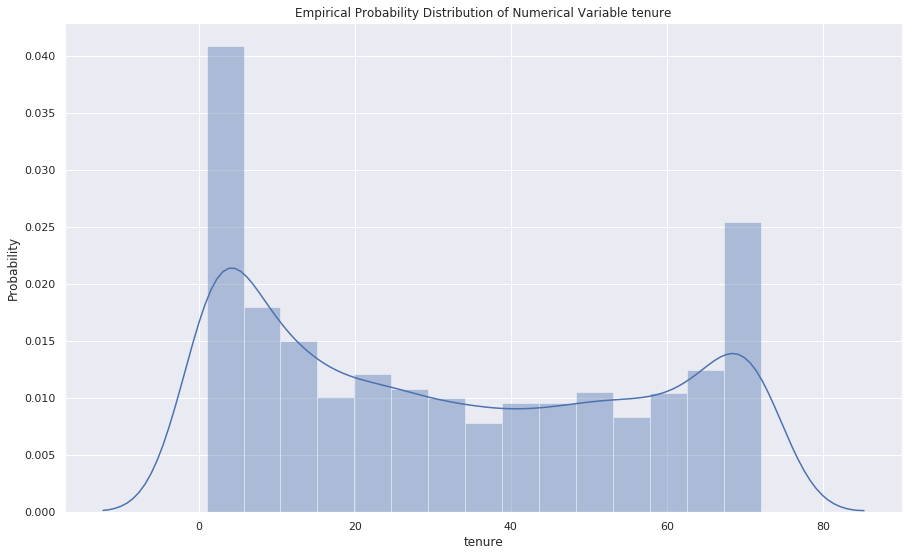

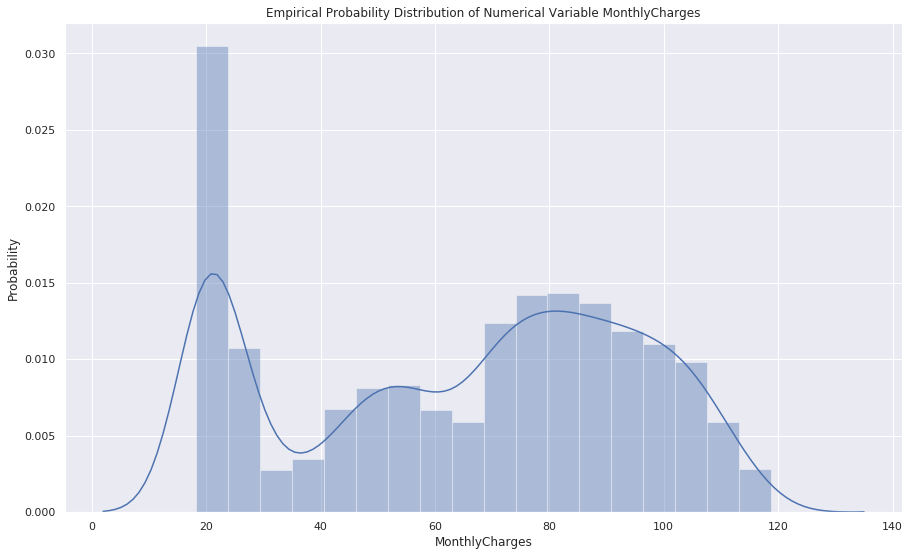

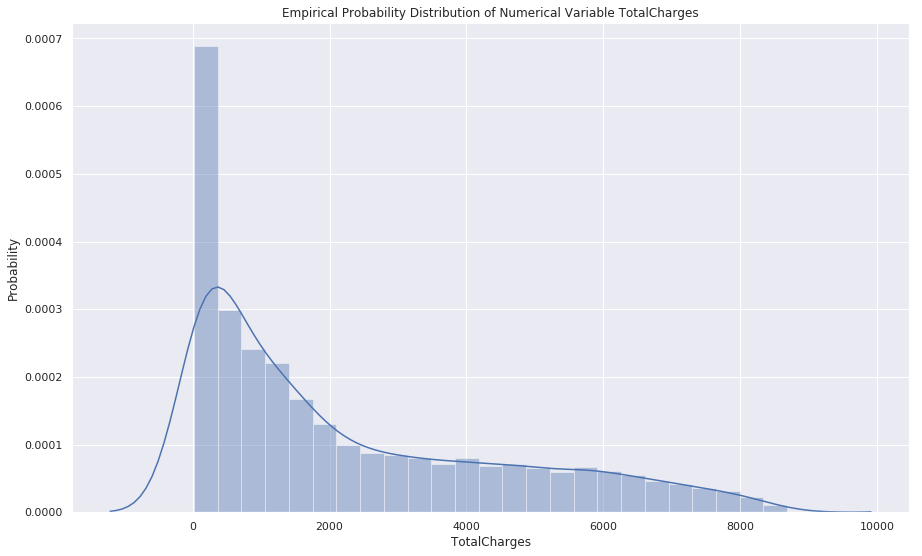

In [9]:
plot_hist(ds,get_num_cols(ds))

## Analysis for the Loyal customer base

In [10]:
## Analysis of product preference
def plot_bars(df):
    # Visual Service
    #plt.figure()
    fig, axes = plt.subplots(1,4,figsize=(18, 5)) 
    sns.countplot(x=df['PhoneService'],hue=df['InternetService'], palette="Reds_d", ax=axes[0])
    sns.countplot(x=df['PhoneService'],hue=df['MultipleLines'], palette="Blues_d", ax=axes[1])
    sns.countplot(x=df['InternetService'],hue=df['StreamingMovies'],palette="Greens_d", ax=axes[2])
    sns.countplot(x=df['InternetService'],hue=df['StreamingTV'],palette="Oranges_d", ax=axes[3])
    plt.show()

    # Visual Support
    #plt.figure()
    fig, axes = plt.subplots(1,4,figsize=(18, 5)) 
    sns.countplot(x=df['InternetService'],hue=df['OnlineSecurity'],palette="Reds_d", ax=axes[0])
    sns.countplot(x=df['InternetService'],hue=df['OnlineBackup'],palette="Blues_d", ax=axes[1])
    sns.countplot(x=df['InternetService'],hue=df['TechSupport'],palette="Greens_d", ax=axes[2])
    sns.countplot(x=df['InternetService'],hue=df['DeviceProtection'],palette="Oranges_d", ax=axes[3])
    plt.show()

def plot_scatter_bw(df):
    #Segmentation

    fig, axes = plt.subplots(1,4,figsize=(18, 10))
    sns.stripplot(x=df['gender'], y=df['TotalCharges'],jitter=True, ax=axes[0])
    sns.stripplot(x=df['SeniorCitizen'], y=df['TotalCharges'],jitter=True, ax=axes[1])
    sns.stripplot(x=df['Partner'], y=df['TotalCharges'],jitter=True, ax=axes[2])
    sns.stripplot(x=df['Dependents'], y=df['TotalCharges'],jitter=True, ax=axes[3])
    plt.show()

    fig, axes = plt.subplots(1,4,figsize=(18, 8))
    sns.boxplot(x=df['gender'], y=df['TotalCharges'], ax=axes[0])
    sns.boxplot(x=df['SeniorCitizen'], y=df['TotalCharges'], ax=axes[1])
    sns.boxplot(x=df['Partner'], y=df['TotalCharges'], ax=axes[2])
    sns.boxplot(x=df['Dependents'], y=df['TotalCharges'],ax=axes[3])
    plt.show()
    #Apparently gender & dependent do not matter much
    
## Analsysis of revenue contribution, i.e. charges and tenure
# Screen of 'Loyal Customer'
def revenue_contr(df):
    dscus=df.copy()
    dscus['SeniorCitizen'] = pd.to_numeric(dscus.SeniorCitizen, errors='coerce')
    partner_mapping = {
               'Yes': 1,
               'No': 0}
    dscus['Partner'] = dscus['Partner'].map(partner_mapping)       
    dscus['Loyal'] = dscus['SeniorCitizen'] + dscus['Partner']
    
    dscus=dscus[(dscus[u'Loyal']>=1)]
    dscus['Loyal'].value_counts()
    display(dscus.head(n=15))
    return dscus

    

def plot_box(df,dscus):
    fig, axes = plt.subplots(1,3,figsize=(18, 5)) 
    sns.countplot(x=dscus['Loyal'],hue=df['InternetService'], palette="Reds_d", ax=axes[0])
    sns.countplot(x=dscus['Loyal'],hue=df['PhoneService'], palette="Reds_d", ax=axes[1])
    sns.countplot(x=dscus['Loyal'],hue=df['Contract'], palette="Reds_d", ax=axes[2])
    plt.show()


In [11]:
ds_loyal = ds.copy()

#ignore the churn
print(ds_loyal['Churn'].value_counts())
print("Overview of customers who have not churned this year")
ds_loyal=ds_loyal[(ds_loyal[u'Churn']=='No')]
ds_loyal.head(n=5)



No     5174
Yes    1869
Name: Churn, dtype: int64
Overview of customers who have not churned this year


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


In [12]:
print("For categorical variables:")
dfprint_l = count_categorical(ds_loyal)
dfprint_l

For categorical variables:


,Variable Name,Category/Count
0,gender,"[(Male, 2625), (Female, 2549)]"
1,SeniorCitizen,"[(0, 4508), (1, 666)]"
2,Partner,"[(Yes, 2733), (No, 2441)]"
3,Dependents,"[(No, 3390), (Yes, 1784)]"
4,PhoneService,"[(Yes, 4662), (No, 512)]"
5,MultipleLines,"[(No, 2541), (Yes, 2121), (No phone service, 512)]"
6,InternetService,"[(DSL, 1962), (Fiber optic, 1799), (No, 1413)]"
7,OnlineSecurity,"[(No, 2037), (Yes, 1724), (No internet service, 1413)]"
8,OnlineBackup,"[(Yes, 1906), (No, 1855), (No internet service, 1413)]"
9,DeviceProtection,"[(No, 1884), (Yes, 1877), (No internet service, 1413)]"


In [13]:
print("For numerical variables:")
ds_loyal.describe().round(4).T

For numerical variables:


,count,mean,std,min,25%,50%,75%,max
tenure,5174.0,37.5700,24.1138,0.00,15.000,38.000,61.000,72.00
MonthlyCharges,5174.0,61.2651,31.0926,18.25,25.100,64.425,88.400,118.75
TotalCharges,5163.0,2555.3441,2329.4570,18.80,577.825,1683.600,4264.125,8672.45


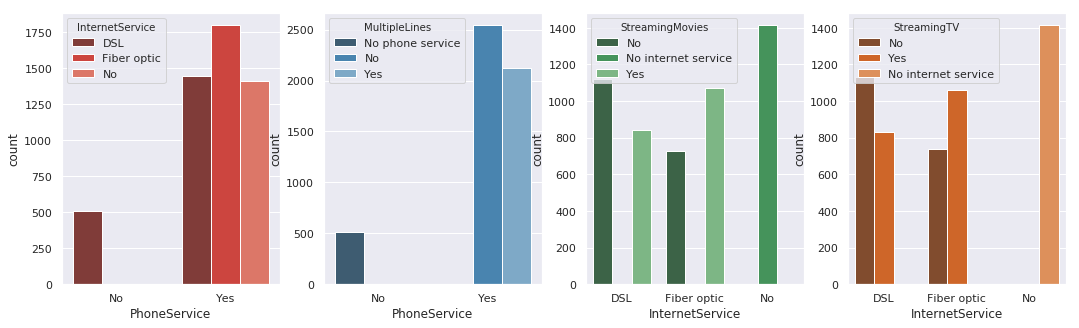

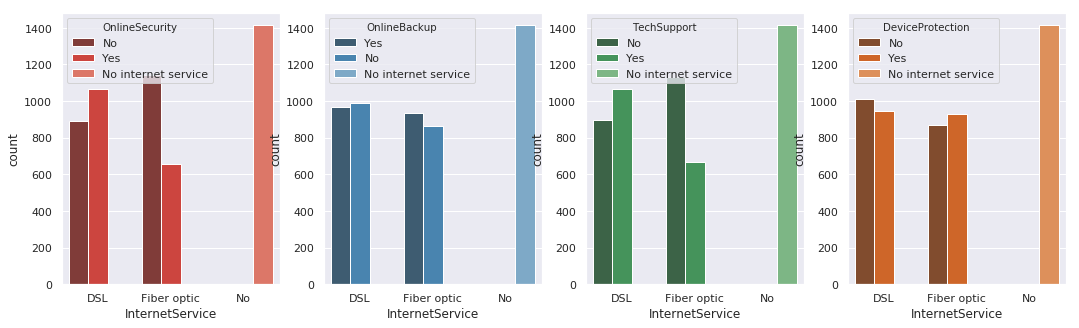

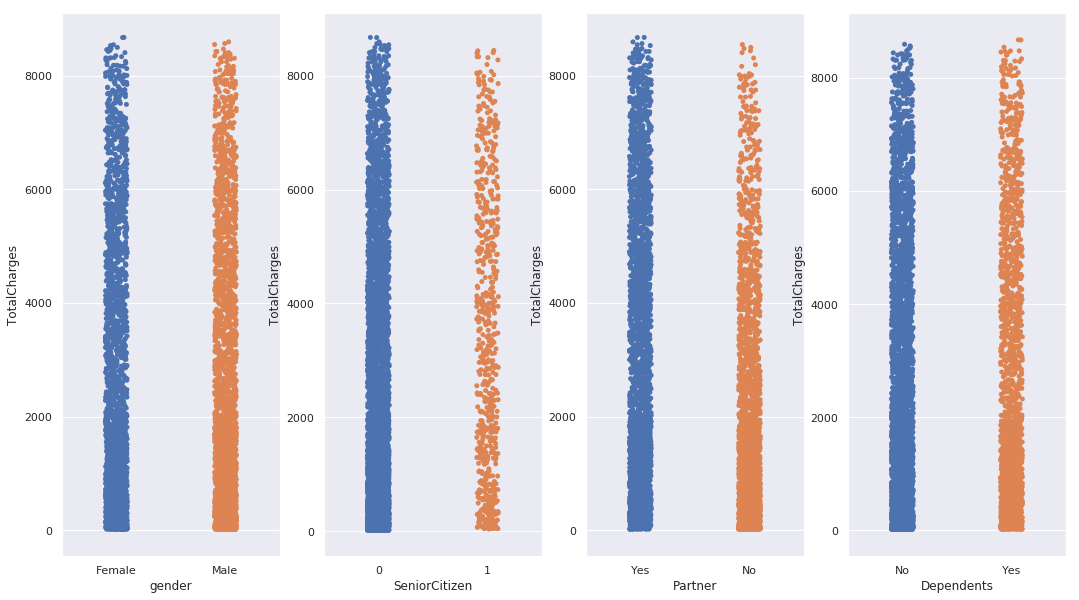

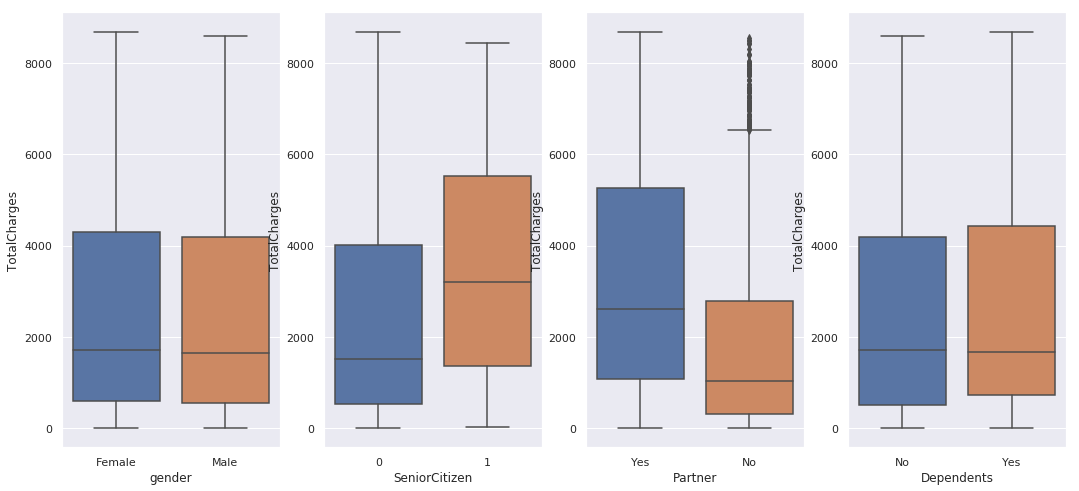

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Loyal
0,Female,0,1,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
10,Male,0,1,Yes,13,Yes,No,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No,1
12,Male,0,1,No,58,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No,1
15,Female,0,1,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No,1
21,Male,0,1,No,12,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No,1
23,Female,0,1,No,58,Yes,Yes,DSL,No,Yes,...,Yes,No,No,Two year,Yes,Credit card (automatic),59.90,3505.10,No,1
24,Male,0,1,Yes,49,Yes,No,DSL,Yes,Yes,...,Yes,No,No,Month-to-month,No,Credit card (automatic),59.60,2970.30,No,1
28,Male,0,1,No,72,Yes,Yes,DSL,Yes,Yes,...,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.25,6369.45,No,1
30,Female,1,1,No,71,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No,2
31,Male,1,1,No,2,Yes,No,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No,2


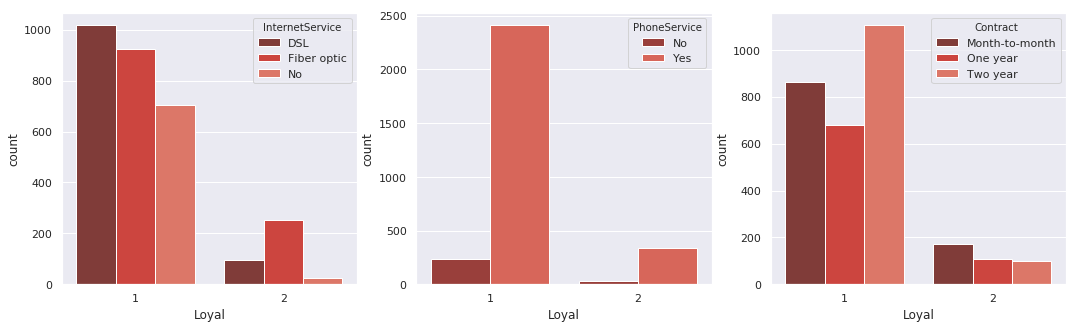

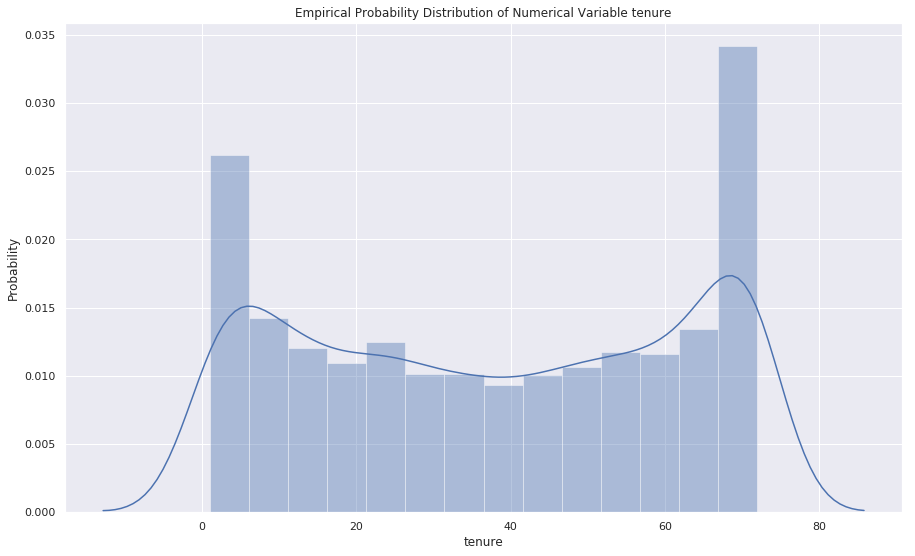

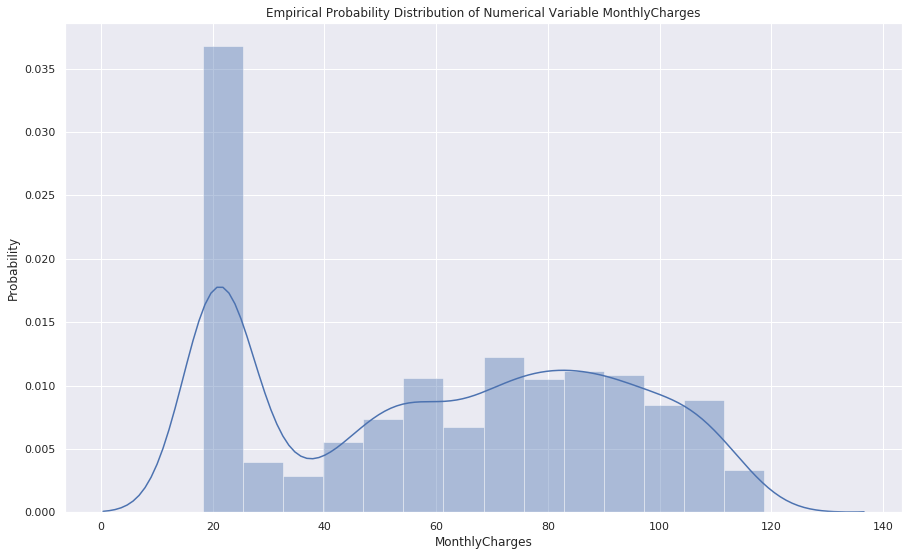

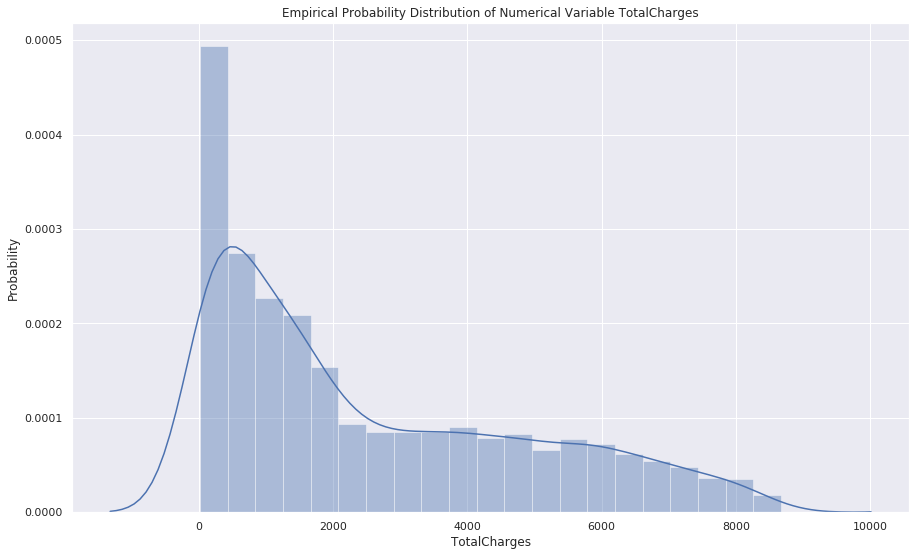

In [14]:
plot_bars(ds_loyal)
plot_scatter_bw(ds_loyal)
dscus = revenue_contr(ds_loyal)
plot_box(ds_loyal,dscus)
plot_hist(ds_loyal,get_num_cols(ds))

## Compare Empirical Distribution of Loyal vs Churn

In [15]:
ds_churn = ds.copy()

#ignore the churn
print(ds_churn['Churn'].value_counts())
print("Overview of customers who have churned this year")
ds_churn=ds_churn[(ds_churn[u'Churn']=='Yes')]
ds_churn.head(n=5)

def plot_more_bars_dis(df, ds_churn):
    fig, axes = plt.subplots(1,3,figsize=(18, 5)) 
    sns.countplot(x=ds_churn['Churn'],hue=df['InternetService'], palette="Reds_d", ax=axes[0])
    sns.countplot(x=ds_churn['Churn'],hue=df['PhoneService'], palette="Reds_d", ax=axes[1])
    sns.countplot(x=ds_churn['Churn'],hue=df['Contract'], palette="Reds_d", ax=axes[2])
    plt.show()

No     5174
Yes    1869
Name: Churn, dtype: int64
Overview of customers who have churned this year


Empirical Distribution of Variable tenure


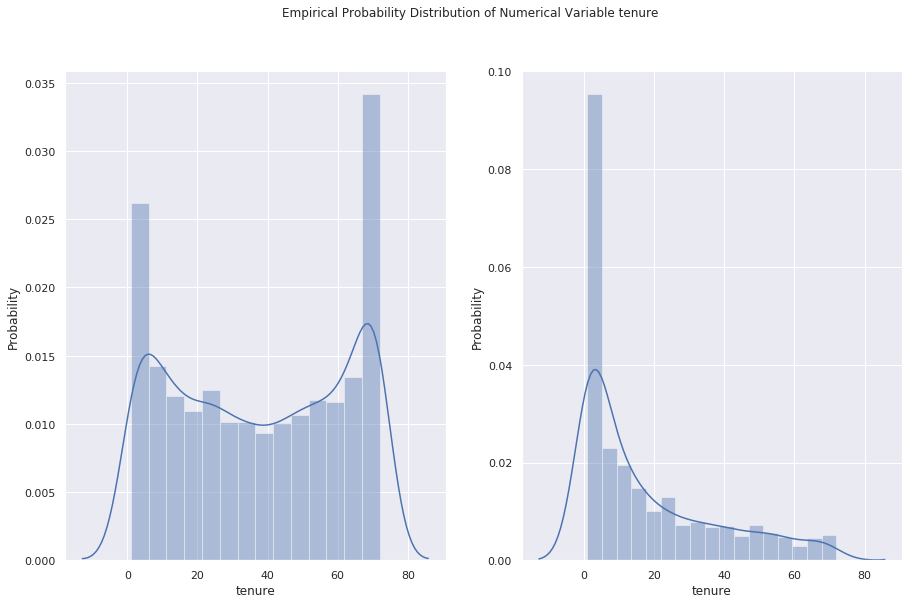

Empirical Distribution of Variable MonthlyCharges


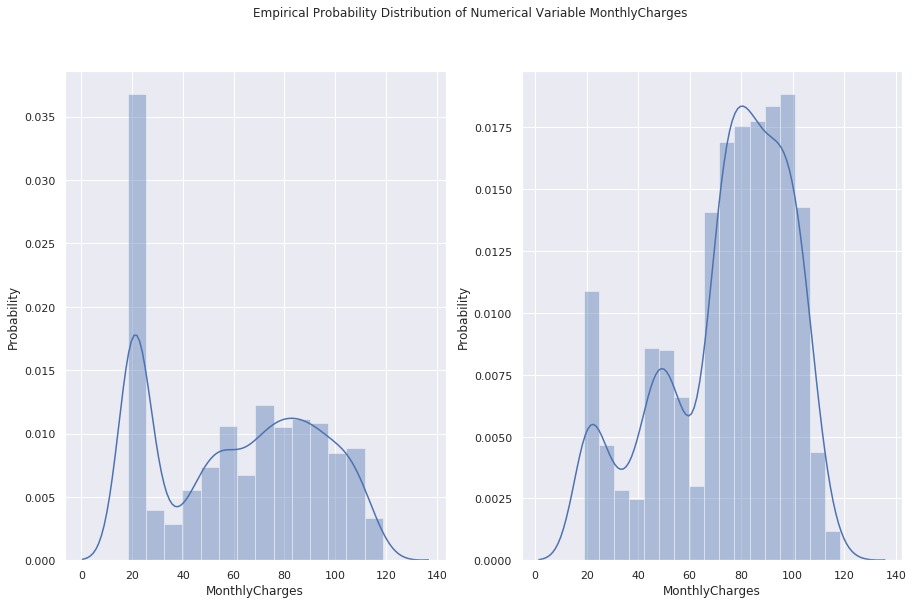

Empirical Distribution of Variable TotalCharges


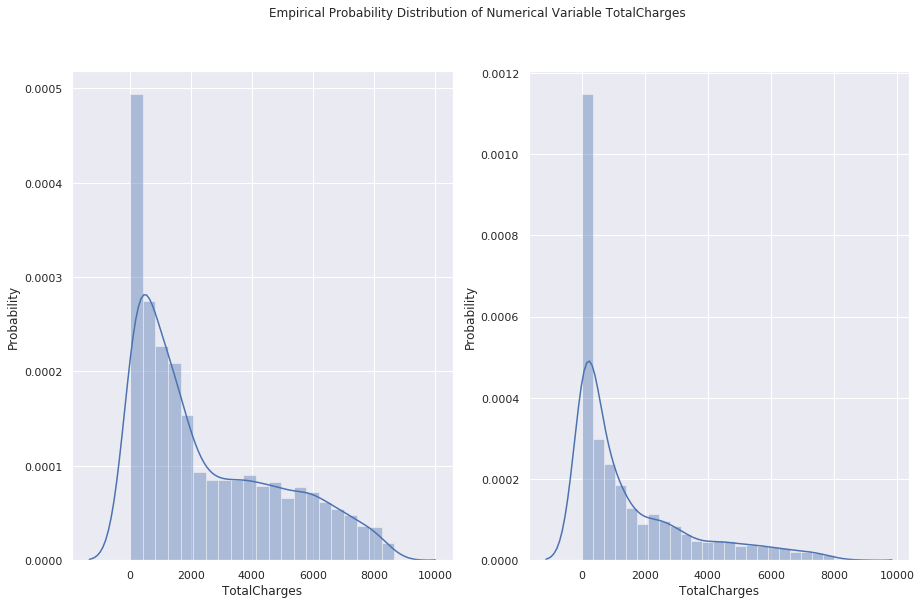

In [16]:
plot_hist2(ds_loyal,ds_churn,get_num_cols(ds))

## Distribution of Categorical Variables related to Churn

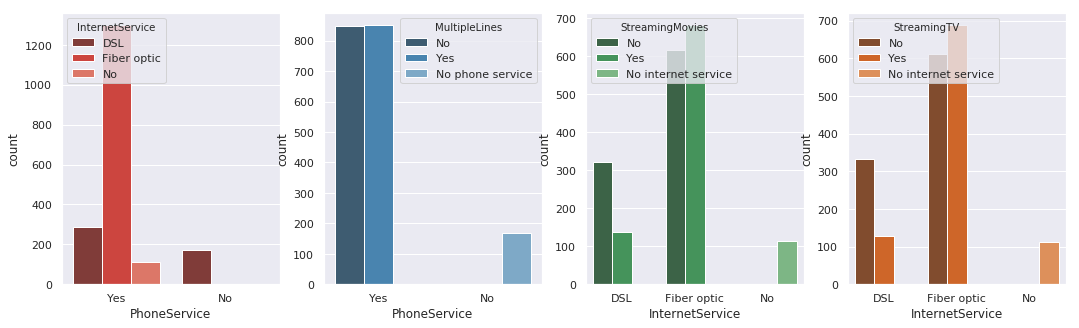

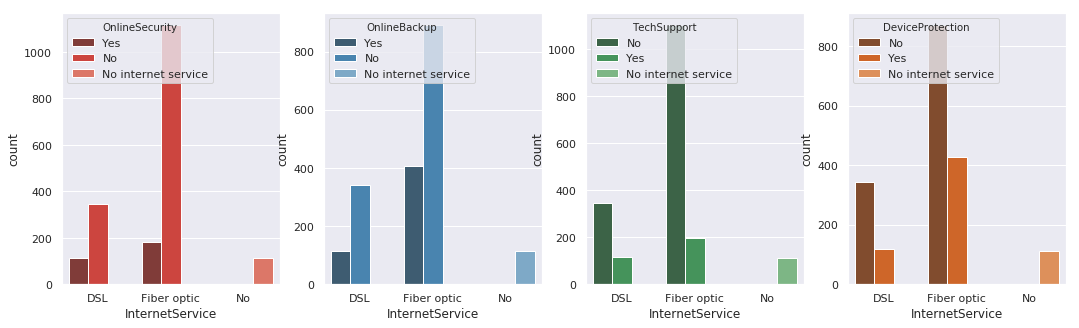

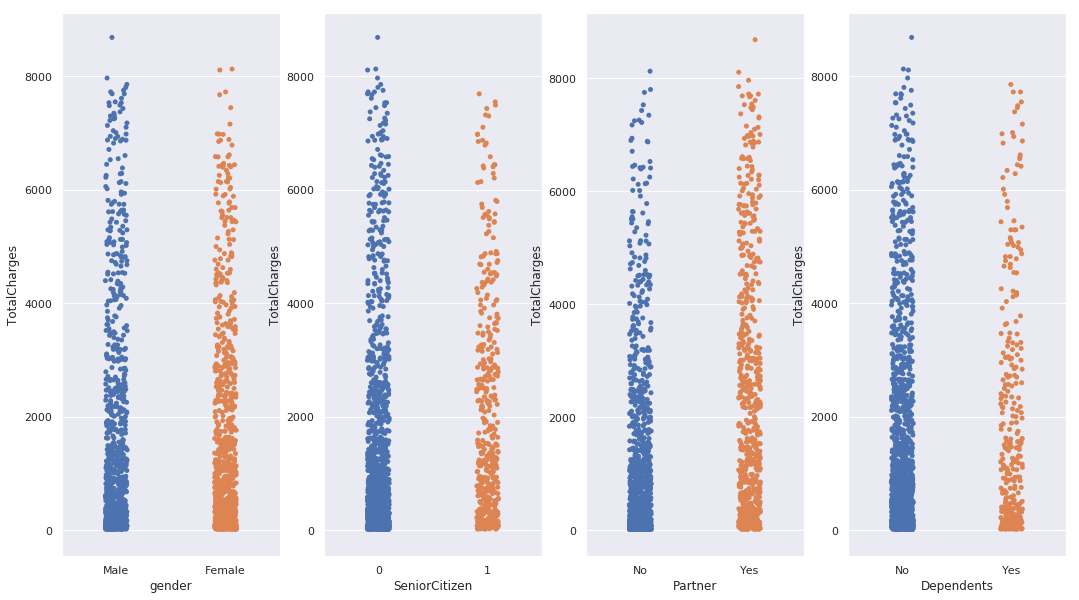

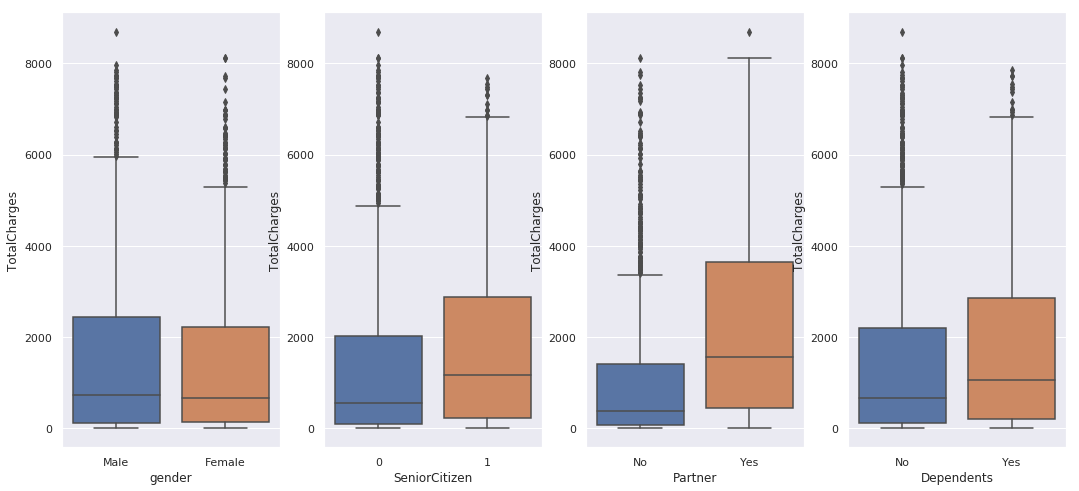

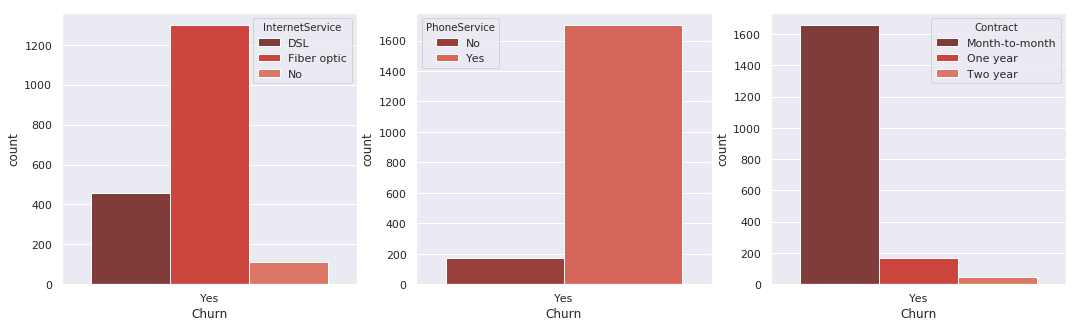

In [31]:
plot_bars(ds_churn)
plot_scatter_bw(ds_churn)
plot_more_bars_dis(ds, ds_churn)

## Lifetime value of loyal customers

In [18]:
data = ds_loyal.drop(["gender","SeniorCitizen","Partner","Dependents","PaperlessBilling","PaymentMethod","Churn"], axis=1)

In [19]:
data = data.dropna()

In [20]:
data = data.replace('No phone service', 'No')
data = data.replace('No internet service', 'No')
data = data.replace('DSL', 'Yes')
data = data.replace('Fiber optic', 'Yes')

In [21]:
data['ServiceCount'] = (data.iloc[:,1:] == 'Yes').sum(axis=1)

In [22]:
data = data.drop(['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract'],axis=1)

In [23]:
data = data.astype(float)

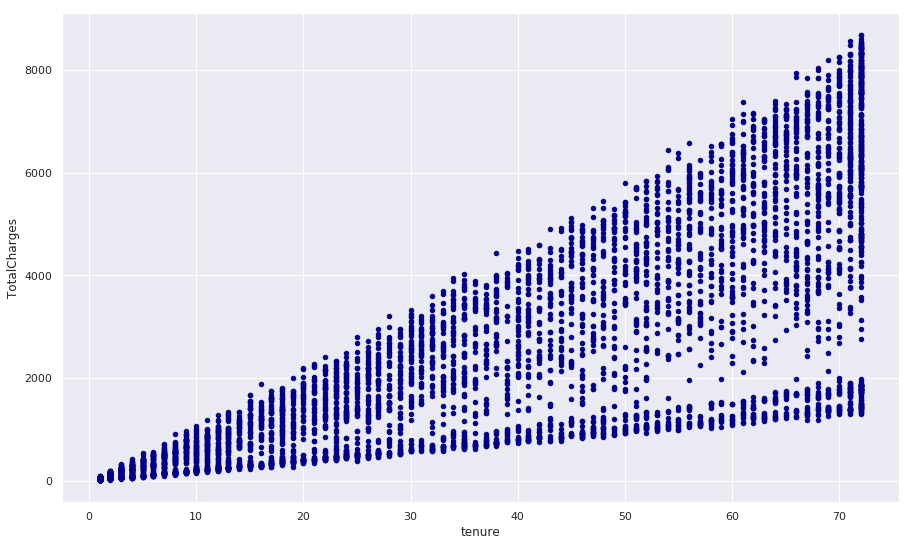

In [24]:
#plt.figure()
data.plot.scatter(x='tenure',y='TotalCharges',color='DarkBlue',figsize=(15,9))
plt.show()

The above graph shows that there is a linear relationship between the tenure and the total charges. However, the graph also shows that there are many users who use the basic service consistently for long period of time. This is illustrated by the lower part of the plot which has high density.

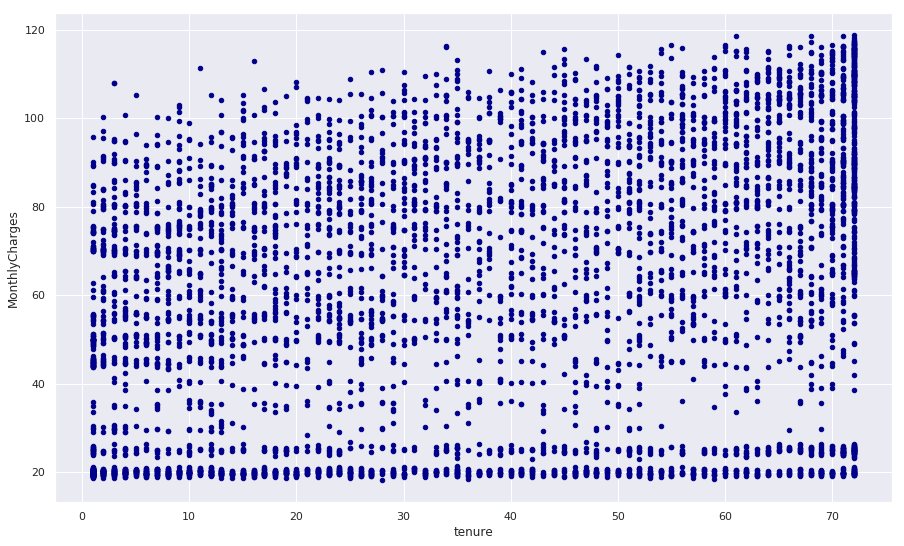

In [25]:
scatter2 = data.plot.scatter(x='tenure',y='MonthlyCharges',color='DarkBlue',figsize=(15,9))
plt.show()

The above plot for monthly charges does not show clear visual representation of the data. Therefore, we divide the data into two segments. People who use either more or less than five services.

In [26]:
data1 = data[data.ServiceCount > 5]
data2 = data[data.ServiceCount < 5]

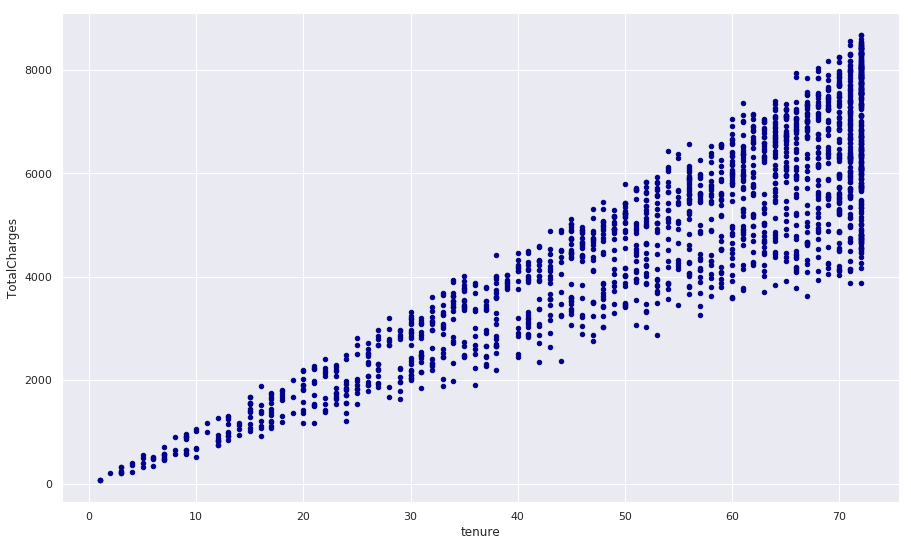

In [27]:
scatter3 = data1.plot.scatter(x='tenure',y='TotalCharges',color='DarkBlue',figsize=(15,9))
plt.show()

The above plot illustrated linear increase of total charges of customers who use more than five services. It is clear in the plot that longer they use more they pay.

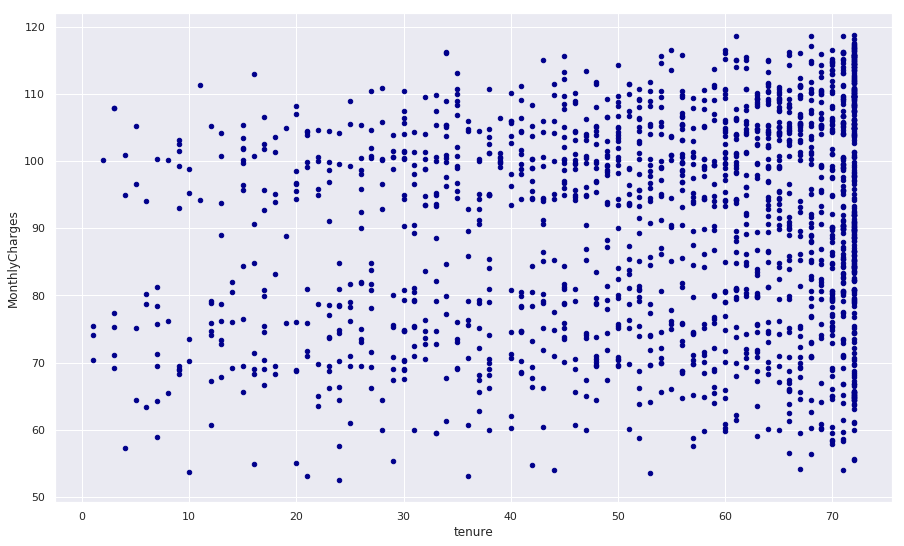

In [28]:
scatter4 = data1.plot.scatter(x='tenure',y='MonthlyCharges',color='DarkBlue',figsize=(15,9))
plt.show()

The above plot shows monthly charges of the customers who use more than five services. It is clear from the graph that loyal customers tend to take more services. Thus, the plot is more dense on the right hand side. 

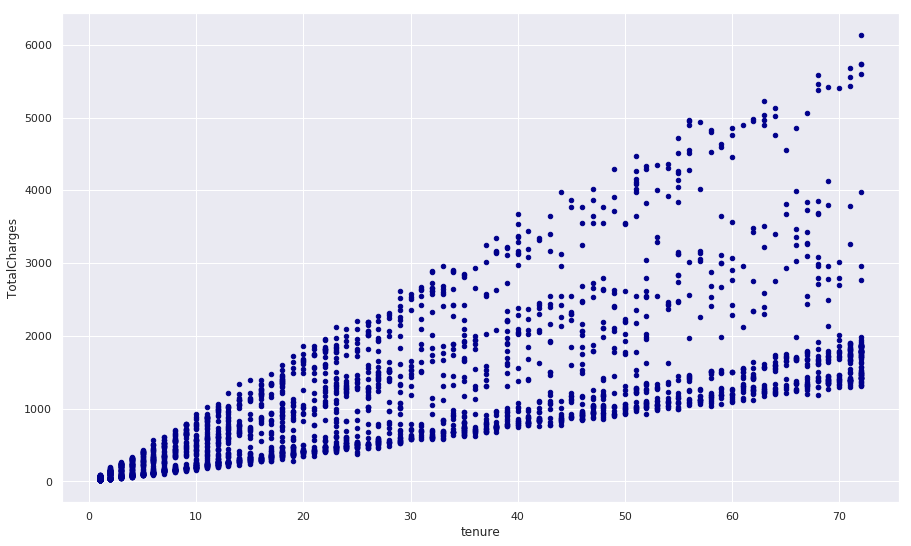

In [29]:
scatter5 = data2.plot.scatter(x='tenure',y='TotalCharges',color='DarkBlue',figsize=(15,9))
plt.show()

The above plot represents the total charges of customers who use less than five services. The graph is more dense at the beginning which means newer customers use less services. Also, there are many customers who stick to the basic services for the long term as the lower part of the graph is consistently thick from beginning untill the end.

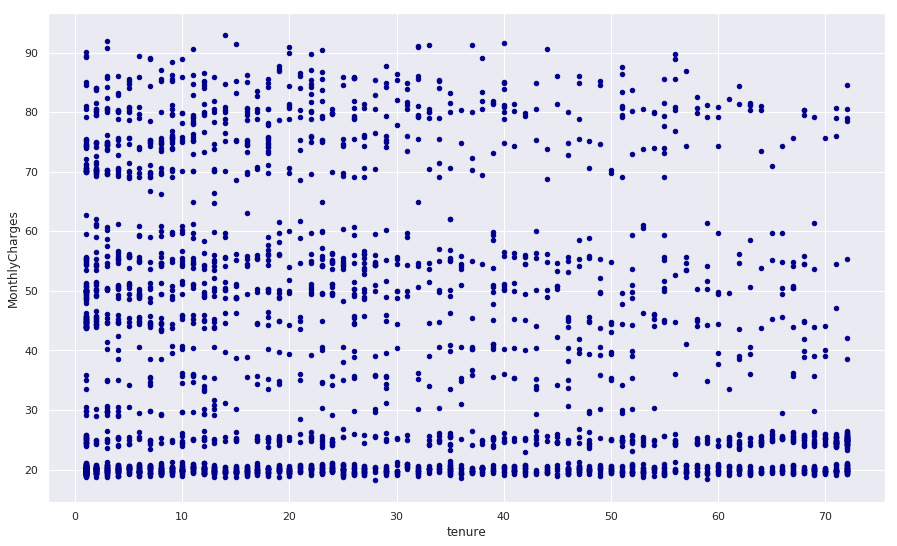

In [30]:
scatter6 = data2.plot.scatter(x='tenure',y='MonthlyCharges',color='DarkBlue',figsize=(15,9))
plt.show()

The above plot illustrates the monthly charges of customers who use less than five services. As it is shown on the graph, the customers who use less than five services are more likely to be newer customers.  